# Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization

### Processing Speeches with SpaCy

We start by only studying speeches given in the 21st century. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from tqdm import tqdm
from collections import Counter

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.8 MB/s  0:00:00m0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
sou = pd.read_csv("data/SOTU.csv")

sou_2000 = sou[sou["Year"] >= 2000]
sou_2000

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
5,Donald J. Trump,2019.0,"\nThe President. Madam Speaker, Mr. Vice Presi...",5519
6,Donald J. Trump,2018.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",5755
7,Donald J. Trump,2017.0,"\nThank you very much. Mr. Speaker, Mr. Vice P...",4903
8,Barack Obama,2016.0,"\nThank you. Mr. Speaker, Mr. Vice President, ...",5956
9,Barack Obama,2015.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",6659


In [3]:
processed_speeches = []
for text in tqdm(sou_2000["Text"], desc="Processing speeches"):
    doc = nlp(text)
    processed_speeches.append(doc)

Processing speeches: 100%|██████████| 25/25 [00:27<00:00,  1.10s/it]


### Analyze Tokens vs Lemmas

#### Token List

We now create a list of tokens across all speeches that are not spaces, stopwords, or punctuation. We also standardize capitalization by making each token lowercase.

In [4]:
all_tokens = []
for doc in processed_speeches:
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            all_tokens.append(token.text.lower())

In [5]:
top_20_tokens = Counter(all_tokens).most_common(20)
top_20_tokens

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

#### Lemma List

We now the same as above, but for lemmas. Lemmas are components of words.

In [6]:
all_lemmas = []  
for doc in processed_speeches:
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            all_lemmas.append(token.lemma_.lower()) 

top_20_lemmas = Counter(all_lemmas).most_common(20)
top_20_lemmas

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

#### Token versus Lemma Comparison

Comparing the top 20 tokens with the top 20 lemmas, the most noticable difference is that the lemma 'year' rises to first place because the counts of 'year' and 'years' are combined. Consequently, lemmas such as 'child' and 'come' appear in the top 20 lemma list even though their tokens didn't. Conversely, the token 'tax' doesn't appear in the top 20 lemma list because it doesn't gain additional frequency from combing multiple word forms.

### Common Words

#### Common Words per Year Function

In [7]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """
    year_df = df[df["Year"] == year]
    lemmas = [] 
    for text in year_df["Text"]:
        doc = nlp(text)  
        for token in doc:
            if not token.is_stop and not token.is_punct and not token.is_space:
                lemmas.append(token.lemma_.lower())
    # Step 3: Get lemmas
    most_common = Counter(lemmas).most_common(n)

    return most_common

In [8]:
# test it on 2024
words_2024 = get_most_common_words(sou, 2024, n=20)
words_2024

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29),
 ('pay', 29),
 ('come', 26),
 ('home', 25),
 ('family', 24),
 ('future', 23),
 ('million', 23),
 ('like', 21),
 ('build', 21),
 ('laughter', 20),
 ('americans', 20)]

#### Comparing 2023 to 2017

In [9]:
words_2023 = get_most_common_words(sou, 2023, n=20)
words_2017 = get_most_common_words(sou, 2017, n=20)

In [10]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [11]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [12]:
df_2017 = pd.DataFrame(words_2017, columns=["Lemma", "Count"])
df_2017.set_index("Lemma", inplace=True)

df_2023 = pd.DataFrame(words_2023, columns=["Lemma", "Count"])
df_2023.set_index("Lemma", inplace=True)

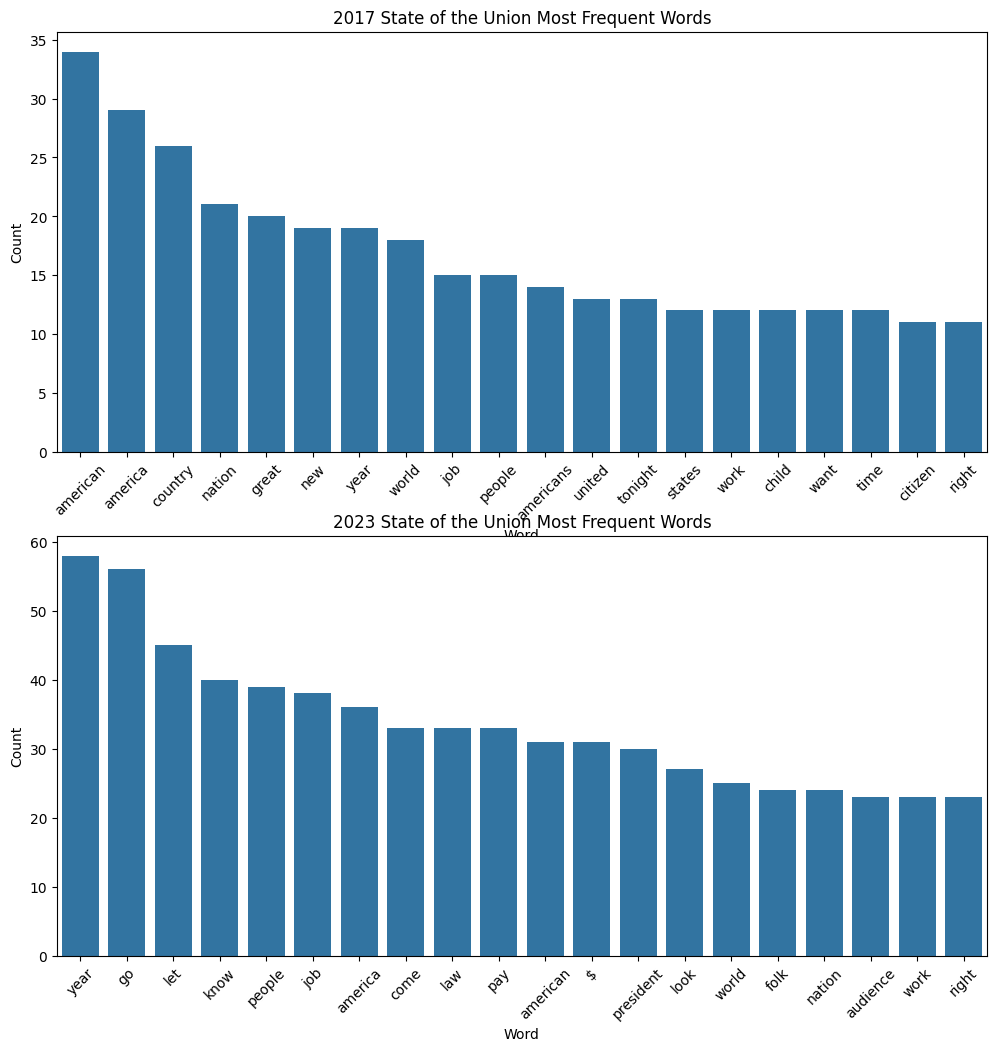

In [13]:
fig, axes = plt.subplots(nrows=2, figsize=(12, 12))

# 2017
sns.barplot(x=df_2017.index, y=df_2017["Count"], ax=axes[0])
axes[0].set_title("2017 State of the Union Most Frequent Words")
axes[0].set_xlabel("Word")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)


# 2023
sns.barplot(x=df_2023.index, y=df_2023["Count"], ax=axes[1])
axes[1].set_title("2023 State of the Union Most Frequent Words")
axes[1].set_xlabel("Word")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=45)
plt.savefig('outputs/02-01_SOTU Most Frequent Words.png')

These plots show the top 20 most frequent words in the SOTU speech of the year, along with their counts.

### TF-IDF Vectorization

To use statistical alorithms on documents, we transform them into vectors, where each element of the vector corresponds to a particular word in a document or corpus of documents. One common way is via TF-IDF embeddings. LLMs work similarly - they typically use transformer models to generate text embeddings before sending text through a deep neural network. 

Here we will fit a TF-IDF vectorizer, plot all the speeches on a 2-D grid using PCA and also using a heatmap, and examine TF-IDF scores for the top 10 most common words in the first speech. 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#### Train the Vectorizer and Transform the Data

In [15]:
raw_docs = sou["Text"].to_list()

In [16]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(raw_docs).toarray()

#### Plot Speeches

First, we set PCA to find first 2 principal components so that we can visualize the speeches on a 2-D grid and observe their relationships.

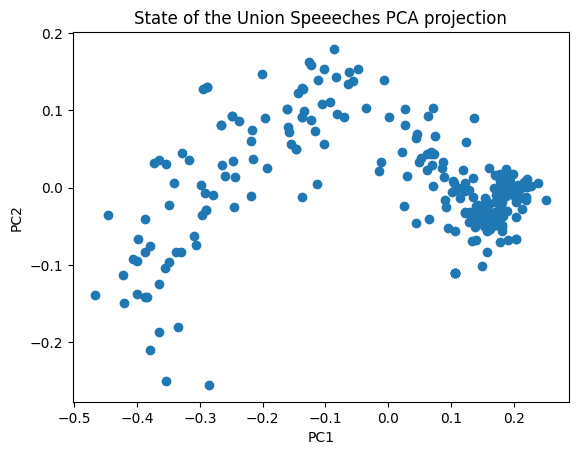

In [17]:
pca = PCA(n_components = 2) 
pca_result = pca.fit_transform(tfidf)
pca_df = pd.DataFrame(pca_result, columns = ['PC1', 'PC2'])
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('State of the Union Speeeches PCA projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('outputs/02-02_PCA projection.png')

The presense of a dense cluster on the right side of the plot is noted. This suggests that these speeches share common features. 

Next, we generated a heatamp to make the differences in TF-IDF scores more apparent.

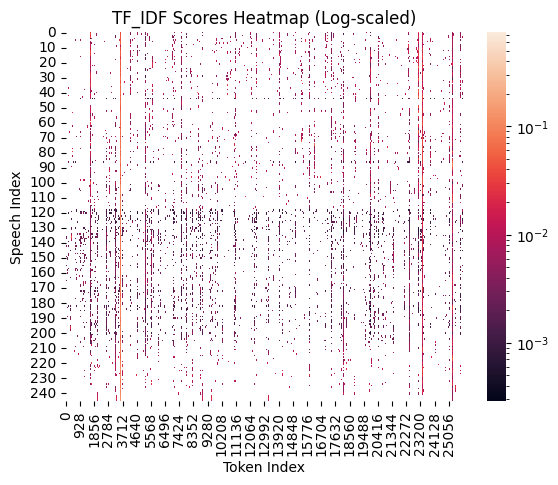

In [18]:
tfidf_df = pd.DataFrame(tfidf)
sns.heatmap(tfidf_df, norm=plt.matplotlib.colors.LogNorm())
plt.title('TF_IDF Scores Heatmap (Log-scaled)')
plt.xlabel('Token Index')
plt.ylabel('Speech Index')
plt.savefig('outputs/02-03_TF_IDF scores heatmap.png')

In the Speech Index range of 120-130, there is a distinct increase in data points with high TF-IDF scores compared to preceding rows, forming a noticeable horiontal line. This shift implies that these speeches reflect a trend of new themes or vocabulary usage that distinguishes them from the earlier group of addresses.

#### Get the TF-IDF value for certain words and documents

In [19]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole speeches

In [20]:
word_nums = [vectorizer.vocabulary_[word] for word in word_list] # get each word's index number
idf_score = [vectorizer.idf_[i] for i in word_nums]

In [21]:
tf_idf = tfidf[0, [i for i in word_nums]] # get the tf_idf score for the first speech

In [22]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438


The table shows the IDF and TF-IDF scores for the top 10 most frequent words throughout whole speeches. Some words have similar IDF scores, but their TF-IDF scores can differ. Also, the word 'job' has the highest IDF score but its TF-IDF score is low. This happens because TF-IDF also accounts for how frequently the word appears in this specific speech. It shows that high IDF does not guarantee a high TF-IDF score.